# Data preprocessing


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
df_business = pd.read_csv('business.csv')

In [3]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t...,23:55,Mumbai,"46,690"


### Airline analysis

In [4]:
df_business['airline'].value_counts()

Vistara      60589
Air India    32898
Name: airline, dtype: int64

### From/To Analysis

In [5]:
df_business['from'].value_counts()

Mumbai       19858
Delhi        18316
Bangalore    16441
Kolkata      13473
Hyderabad    12870
Chennai      12529
Name: from, dtype: int64

In [6]:
df_business['to'].value_counts()

Mumbai       18991
Delhi        16707
Bangalore    16198
Kolkata      14758
Hyderabad    13675
Chennai      13158
Name: to, dtype: int64

In [7]:
df_business.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

## Data preparation
### Conversion of time_taken from categories to hours (float)

In [13]:
# convert time_taken to hours flight_duration

def time_to_hours(time_str: str) -> float:
    parts = time_str.split(" ")
    hours = 0
    minutes = 0
    try:
        hours = float(parts[0].replace('h', ''))
        minutes = float(parts[1].replace('m', ''))
    except ValueError as e:
        print(time_str)
        print(e)
    return hours + minutes / 60

df_business['time_taken'] = df_business['time_taken'].apply(time_to_hours)

AttributeError: 'float' object has no attribute 'split'

### Removing flight number code (ch_code and num_code )

In [10]:
df_business.drop(['ch_code', 'num_code'], axis=1, inplace=True)

In [11]:
df_business['stop'].value_counts()

1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                          8102
2+-stop                                                                           1083
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\r\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\r\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\r\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\r\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\r\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\r\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\r\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\r\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\r\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyder

### Convert the number of stops from strings to numeric values (0, 1, or 2)

In [14]:
def convert_stops(stops_str: str) -> int:
    stops = stops_str.split("-")[0][0]
    return 0 if stops == "n" else int(stops)

df_business['stop'] = df_business['stop'].apply(convert_stops)
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,18:00,Delhi,2.000000,0,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,19:00,Delhi,2.250000,0,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,20:00,Delhi,24.750000,1,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,21:25,Delhi,26.500000,1,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,17:15,Delhi,6.666667,1,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,09:45,Chennai,10.083333,1,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,12:30,Chennai,10.416667,1,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,07:05,Chennai,13.833333,1,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,07:00,Chennai,10.000000,1,17:00,Hyderabad,"81,585"


### Convert departure and arrival times from HH:MM to categories (*Morning, Afternoon, Evening, Night*)

In [15]:
def time_to_category(time_str: str) -> str:
    hour = int(time_str.split(':')[0])  # Extract the hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


df_business['dep_time'] = df_business['dep_time'].apply(time_to_category)
df_business['arr_time'] = df_business['arr_time'].apply(time_to_category)
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,"25,612"
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,"25,612"
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,"42,220"
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,"44,450"
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,"69,265"
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,"77,105"
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,"79,099"
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,"81,585"


### Compute distances between cities (precompute to save time), to include a new distance feature that better represent the from and to features

In [18]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to get coordinates of a city
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None
    
distances = dict()

def get_distance(city1, city2):
    # Create a sorted tuple key for consistent lookups (city1, city2) == (city2, city1)
    if city1 == city2:
        return 0
    
    key = tuple(sorted([city1, city2]))
    
    if key not in distances:
        coords1 = get_coordinates(city1)
        coords2 = get_coordinates(city2)
        
        if coords1 and coords2:
            distances[key] = geodesic(coords1, coords2).kilometers
        else:
            distances[key] = None  # Handle cases where coordinates are not found
    
    return distances[key]
 

In [20]:
unique_cities = set(pd.unique(df_business['from']).tolist() + pd.unique(df_business['to']).tolist())
for city in unique_cities:
    for city2 in unique_cities:
        get_distance(city, city2)

In [21]:
df_business['distance'] = df_business.apply(
    lambda row: get_distance(row['from'], row['to']),
    axis=1
)
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,distance
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,"25,612",1143.524859
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,"25,612",1143.524859
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,"42,220",1143.524859
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,"44,450",1143.524859
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,"46,690",1143.524859
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,"69,265",511.055118
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,"77,105",511.055118
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,"79,099",511.055118
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,"81,585",511.055118


### Convert comma-formatted price string to numerical value

In [22]:
# price fix
df_business['price'] = df_business['price'].astype(str).str.replace(",", "").astype(int)
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,distance
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,25612,1143.524859
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,25612,1143.524859
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,42220,1143.524859
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,44450,1143.524859
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,46690,1143.524859
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,69265,511.055118
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,77105,511.055118
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,79099,511.055118
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,81585,511.055118


### Detecting outliers

In [23]:
df_business.price.describe()

count     93487.000000
mean      52540.081124
std       12969.314606
min       12000.000000
25%       45185.000000
50%       53164.000000
75%       60396.000000
max      123071.000000
Name: price, dtype: float64

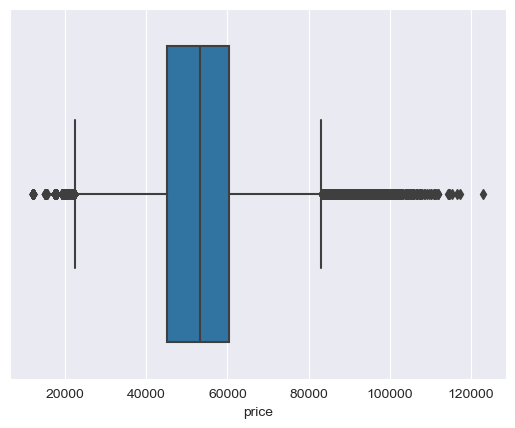

In [24]:
import seaborn as sns

sns.boxplot(x=df_business['price'])

plt.show()

In [25]:
Q1 = df_business['price'].quantile(0.25)

Q3 = df_business['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

outliers = df_business[(df_business['price'] < lower_bound) | (df_business['price'] > upper_bound)]

outliers

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,distance
121,12-02-2022,Vistara,Evening,Delhi,26.833333,1,Evening,Mumbai,95657,1143.524859
208,13-02-2022,Vistara,Afternoon,Delhi,18.000000,1,Morning,Mumbai,85527,1143.524859
209,13-02-2022,Vistara,Morning,Delhi,6.500000,1,Afternoon,Mumbai,86137,1143.524859
210,13-02-2022,Vistara,Morning,Delhi,13.833333,1,Evening,Mumbai,86137,1143.524859
211,13-02-2022,Vistara,Afternoon,Delhi,9.083333,1,Night,Mumbai,86776,1143.524859
...,...,...,...,...,...,...,...,...,...,...
93401,29-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,87051,511.055118
93402,29-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,89537,511.055118
93403,30-03-2022,Air India,Evening,Chennai,1.333333,0,Night,Hyderabad,15000,511.055118
93444,30-03-2022,Vistara,Evening,Chennai,16.000000,1,Morning,Hyderabad,87118,511.055118


### Remove outliers

In [29]:
df_business= df_business[(df_business['price'] >= lower_bound) & (df_business['price'] <= upper_bound)]

df_business


,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,distance
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,25612,1143.524859
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,25612,1143.524859
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,42220,1143.524859
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,44450,1143.524859
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,46690,1143.524859
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,69265,511.055118
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,77105,511.055118
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,79099,511.055118
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,81585,511.055118


### One hot encoding apply in the categorical variables


In [30]:
categorical_variables = ['airline', 'dep_time', 'from', 'arr_time', 'to']
df_final = df_business.copy()
for category in categorical_variables:
    one_hot = pd.get_dummies(df_business[category], prefix=category)
    one_hot = one_hot.astype(int)
    df_final = pd.concat([one_hot, df_final], axis=1)
    df_final.drop([category], axis=1, inplace=True)
df_final.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Evening,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,date,time_taken,stop,price,distance
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,11-02-2022,2.000000,0,25612,1143.524859
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,11-02-2022,2.250000,0,25612,1143.524859
2,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,11-02-2022,24.750000,1,42220,1143.524859
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,11-02-2022,26.500000,1,44450,1143.524859
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,11-02-2022,6.666667,1,46690,1143.524859


### Split the date into columns (for days and months)

In [37]:
df_final['date'] = pd.to_datetime(df_final['date'], format='%d-%m-%Y')
df_final['dia'] = df_final['date'].dt.day
df_final['mes'] = df_final['date'].dt.month

df_final.drop('date', axis=1, inplace=True)
df_final.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,time_taken,stop,price,distance,dia,mes
0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,2.000000,0,25612,1143.524859,11,2
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,2.250000,0,25612,1143.524859,11,2
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,24.750000,1,42220,1143.524859,11,2
3,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,26.500000,1,44450,1143.524859,11,2
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,6.666667,1,46690,1143.524859,11,2


### Correlation matrix


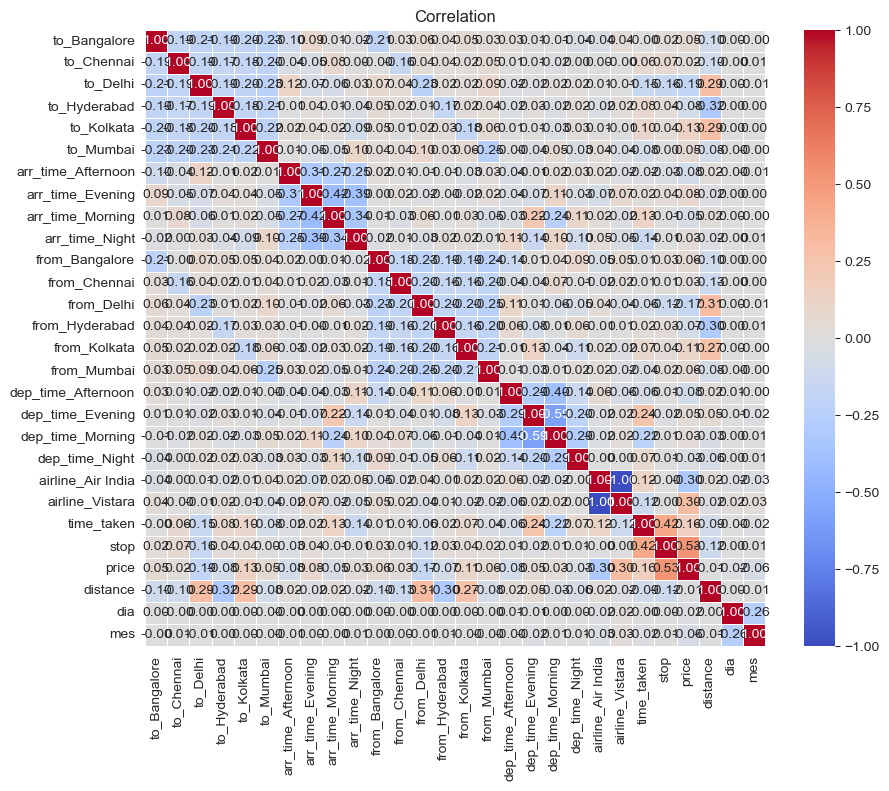

In [38]:
correlation_matrix = df_final.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation')

plt.show()